Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025.csv
Using file: nba_traditional_stats_2024_2025.csv
Filtered to 422 players for 2024-25 Regular Season
Sample of Low-Turnover High-Usage Stars:


,PLAYER,TEAM,GP,MIN,PTS,FGA,FTA,TOV,Usage_pg,TOV_per36,LowTO_HighUsage_Index
0,DeMar DeRozan,SAC,77,2768,1710,1308,441,105,19.507013,1.365607,14.284501
1,Keegan Murray,SAC,76,2610,942,820,72,60,11.206316,0.827586,13.540965
2,Sam Hauser,BOS,71,1541,605,474,11,23,6.744225,0.537313,12.551753
3,Tim Hardaway Jr.,DET,77,2153,844,680,145,48,9.659740,0.802601,12.035544
4,Gary Trent Jr.,MIL,74,1893,824,657,92,42,9.425405,0.798732,11.800458
5,Harrison Barnes,SAS,82,2230,1011,683,199,50,9.397073,0.807175,11.641930
6,Rui Hachimura,LAL,59,1869,775,576,113,49,10.605424,0.943820,11.236699
7,OG Anunoby,NYK,74,2706,1332,1027,226,102,15.222162,1.356984,11.217639
8,Dillon Brooks,HOU,75,2388,1053,895,121,76,12.643200,1.145729,11.035074
9,Pascal Siakam,IND,78,2548,1578,1182,308,109,16.891282,1.540031,10.968141



Top 15 Low-Turnover High-Usage Stars:


,PLAYER,TEAM,GP,MIN,PTS,FGA,FTA,TOV,Usage_pg,TOV_per36,LowTO_HighUsage_Index
0,DeMar DeRozan,SAC,77,2768,1710,1308,441,105,19.507013,1.365607,14.284501
1,Keegan Murray,SAC,76,2610,942,820,72,60,11.206316,0.827586,13.540965
2,Sam Hauser,BOS,71,1541,605,474,11,23,6.744225,0.537313,12.551753
3,Tim Hardaway Jr.,DET,77,2153,844,680,145,48,9.659740,0.802601,12.035544
4,Gary Trent Jr.,MIL,74,1893,824,657,92,42,9.425405,0.798732,11.800458
5,Harrison Barnes,SAS,82,2230,1011,683,199,50,9.397073,0.807175,11.641930
6,Rui Hachimura,LAL,59,1869,775,576,113,49,10.605424,0.943820,11.236699
7,OG Anunoby,NYK,74,2706,1332,1027,226,102,15.222162,1.356984,11.217639
8,Dillon Brooks,HOU,75,2388,1053,895,121,76,12.643200,1.145729,11.035074
9,Pascal Siakam,IND,78,2548,1578,1182,308,109,16.891282,1.540031,10.968141


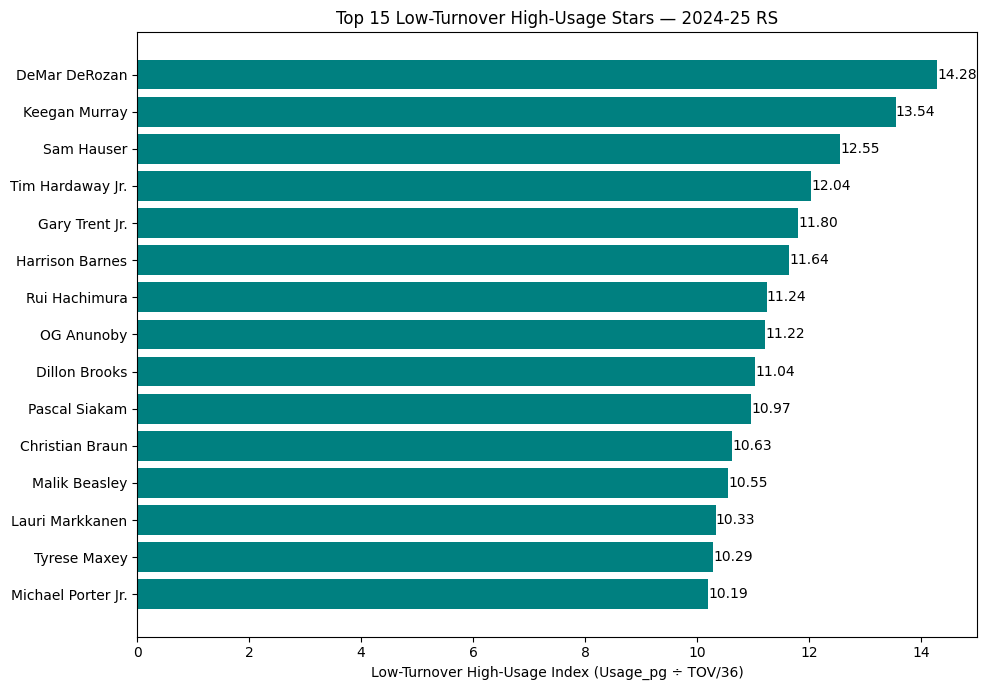

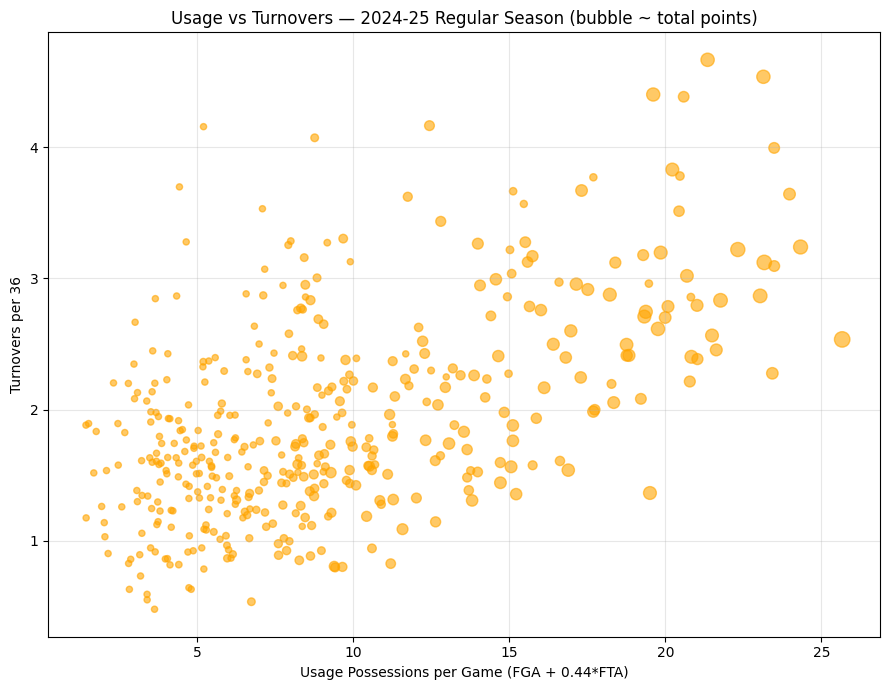


Saved:
- low_to_high_usage_table_2024_25.csv (full table)
- leaders_low_to_high_usage_2024_25.csv (top leaders)
- low_to_high_usage_stars.png
- usage_vs_turnovers_scatter.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# 🏀 Low-Turnover High-Usage Stars — 2024-25 Regular Season
# ------------------------------------------------------------
# Combines:
# - Heavy Usage Proxy = FGA + 0.44*FTA
# - TOV per 36 minutes
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

# ================================
# 1) Load CSV (Colab or Local)
# ================================
try:
    from google.colab import files
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]
except:
    file_path = "nba_traditional_stats_2024_2025.csv"   # <-- change if local

print("Using file:", file_path)
df = pd.read_csv(file_path)
df.columns = [c.strip() for c in df.columns]

# Clean Season Type
if "Season Type" in df.columns:
    df["Season Type"] = df["Season Type"].astype(str).str.replace("%20", " ", regex=False)

# Ensure numeric
num_cols = ["GP","MIN","FGA","FTA","TOV","PTS"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ================================
# 2) Filter to 2024-25 Regular Season
# ================================
df_use = df[(df["Year"] == "2024-25") &
            (df["Season Type"].str.lower() == "regular season")].copy()

MIN_GP = 20
MIN_MINUTES = 300
df_use = df_use[(df_use["GP"] >= MIN_GP) & (df_use["MIN"] >= MIN_MINUTES)].copy()

print(f"Filtered to {len(df_use)} players for 2024-25 Regular Season")

# ================================
# 3) Compute Heavy Usage Proxy & Turnovers
# ================================
# Heavy Usage Proxy
df_use["Usage_Poss"] = df_use["FGA"] + 0.44 * df_use["FTA"]
df_use["Usage_pg"] = np.where(df_use["GP"] > 0, df_use["Usage_Poss"] / df_use["GP"], np.nan)

# TOV per 36
df_use["TOV_per36"] = (df_use["TOV"] / df_use["MIN"]) * 36

# Composite: Usage_pg / TOV_per36 (higher = high usage, low turnovers)
df_use["LowTO_HighUsage_Index"] = np.where(df_use["TOV_per36"] > 0,
                                           df_use["Usage_pg"] / df_use["TOV_per36"],
                                           np.nan)

cols_out = ["PLAYER","TEAM","GP","MIN","PTS","FGA","FTA","TOV",
            "Usage_pg","TOV_per36","LowTO_HighUsage_Index"]
stars_tbl = (df_use[cols_out]
             .sort_values("LowTO_HighUsage_Index", ascending=False)
             .reset_index(drop=True))

print("Sample of Low-Turnover High-Usage Stars:")
display(stars_tbl.head(10))

# ================================
# 4) Leaderboard
# ================================
TOPN = 15
leaders = stars_tbl.head(TOPN)

print(f"\nTop {TOPN} Low-Turnover High-Usage Stars:")
display(leaders)

# ================================
# 5) Plots
# ================================
plt.figure(figsize=(10, 7))
plt.barh(leaders["PLAYER"][::-1], leaders["LowTO_HighUsage_Index"][::-1], color="teal")
for i, v in enumerate(leaders["LowTO_HighUsage_Index"][::-1]):
    plt.text(v, i, f"{v:.2f}", va="center", ha="left")
plt.xlabel("Low-Turnover High-Usage Index (Usage_pg ÷ TOV/36)")
plt.title(f"Top {TOPN} Low-Turnover High-Usage Stars — 2024-25 RS")
plt.tight_layout()
plt.savefig("low_to_high_usage_stars.png", dpi=300)
plt.show()

# Scatter: Usage_pg vs TOV_per36
plt.figure(figsize=(9, 7))
plt.scatter(df_use["Usage_pg"], df_use["TOV_per36"],
            s=np.clip(df_use["PTS"]/20, 20, 400),
            alpha=0.6, c="orange")
plt.xlabel("Usage Possessions per Game (FGA + 0.44*FTA)")
plt.ylabel("Turnovers per 36")
plt.title("Usage vs Turnovers — 2024-25 Regular Season (bubble ~ total points)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("usage_vs_turnovers_scatter.png", dpi=300)
plt.show()

# ================================
# 6) Save Outputs
# ================================
stars_tbl.to_csv("low_to_high_usage_table_2024_25.csv", index=False)
leaders.to_csv("leaders_low_to_high_usage_2024_25.csv", index=False)

print("\nSaved:")
print("- low_to_high_usage_table_2024_25.csv (full table)")
print("- leaders_low_to_high_usage_2024_25.csv (top leaders)")
print("- low_to_high_usage_stars.png")
print("- usage_vs_turnovers_scatter.png")

# ================================
# 7) Zip & Download (Colab)
# ================================
import os, zipfile
from google.colab import files

outputs = [
    "low_to_high_usage_table_2024_25.csv",
    "leaders_low_to_high_usage_2024_25.csv",
    "low_to_high_usage_stars.png",
    "usage_vs_turnovers_scatter.png"
]

zip_name = "low_to_high_usage_outputs_2024_25.zip"

with zipfile.ZipFile(zip_name, "w") as z:
    for f in outputs:
        if os.path.exists(f):
            z.write(f)

files.download(zip_name)